In [1]:
import gzip
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np
from natsort import natsorted
from torchvision.datasets import ImageFolder
from torch import optim
from PIL import Image
import pandas as pd

In [2]:
complete_dataset_path='D:\\Studies\\MSc\\MSc Project\\dataset\\2019-12-16-latest-level.json.gz'
f=gzip.open(complete_dataset_path)
complete_dataset=[]
cnt=0
while 1:
    if cnt==50000: # Here extract 30,000 data
        break
    line=f.readline()
    tmp=line.decode()
    complete_dataset.append(tmp)
    cnt+=1
f.close()

In [3]:
j=json.loads(complete_dataset[29999])
j

{'uuid': '6b0c2ee0-50a9-4608-87d4-1fc75f3e87bf',
 'stored_at': '2017-09-05T07:22:27+00:00',
 'duration': 58.4801636,
 'level_instance_json': {'meta': {'user_id': 0,
   'level_id': 16,
   'duration': 58.4801636,
   'previous_attempts': 1,
   'early_termination': False,
   'platform': 'ANDROID',
   'app_version': '1.2.2',
   'map_view_duration': 3.5256958},
  'events': {'0': {'time': 0, 'type': 'landmark', 'id': 68, 'visible': True},
   '1': {'time': 14, 'type': 'landmark', 'id': 68, 'visible': False},
   '2': {'time': 19, 'type': 'landmark', 'id': 68, 'visible': True},
   '3': {'time': 20, 'type': 'landmark', 'id': 21, 'visible': True},
   '4': {'time': 20, 'type': 'landmark', 'id': 22, 'visible': True},
   '5': {'time': 20, 'type': 'landmark', 'id': 42, 'visible': True},
   '6': {'time': 21, 'type': 'landmark', 'id': 0, 'visible': True},
   '7': {'time': 21, 'type': 'landmark', 'id': 1, 'visible': True},
   '8': {'time': 21, 'type': 'landmark', 'id': 2, 'visible': True},
   '9': {'time

In [4]:
SHQ_DF=pd.DataFrame(columns=('user_id','level','duration','previous_attempts','platform','record_time','captured_flag','trajectory'))

In [5]:
for i in range(0,len(complete_dataset)):
    data=json.loads(complete_dataset[i])
    user_id=data['user_id']
    level=data['level_instance_json']['meta']['level_id']
    duration=data['level_instance_json']['meta']['duration']
    previous_attempts=data['level_instance_json']['meta']['previous_attempts']
    platform=data['level_instance_json']['meta']['platform']
    record_time=data['stored_at']
    events_set=data['level_instance_json']['events']
    keys=events_set.keys()
    captured_flag=[]
    
    for key in keys:
        # print(events_set[key]['visible'])
        if events_set[key]['type'] == 'flag':
            if events_set[key]['visible'] == True:
                captured_flag.append((events_set[key]['id'],events_set[key]['time']))
    keys=data['level_instance_json']['player'].keys()
    trajectory=[]
    for key in keys:
        trajectory.append((data['level_instance_json']['player'][key]['x'],data['level_instance_json']['player'][key]['y'],data['level_instance_json']['player'][key]['r']))   
    SHQ_DF.loc[i]=[user_id,level,duration,previous_attempts,platform,record_time,captured_flag,trajectory]

In [6]:
SHQ_DF

user_id level    duration  \
0      caf5335a-5a88-48f0-9a92-c980d4a1908e    13   53.159546   
1      4430c6c4-3e37-4868-be86-286b4a739dd2     1   14.101845   
2      e5e61b28-b0a6-4363-a26f-f0782c5ff14f     4   17.335175   
3      003f0d02-a1df-46d5-978a-5cbf9c4e690d     3   14.748108   
4      d0bfb46b-7bc7-448c-8a8e-1d92a065174f    14   11.884094   
...                                     ...   ...         ...   
49995  475587f1-220d-4ec3-b8e3-f55cadaf1f48    22  117.172607   
49996  609198fd-63d6-4e8d-ac25-80d99d93bb9e    18   95.179470   
49997  96509599-8312-4860-86f0-0210a4a8e29e    41  122.646667   
49998  a690d1e5-460b-458d-a74c-81d1419b57d1    13   53.375977   
49999  a3c8ec55-1fee-4bf3-8e19-09830c8be5ab     2   19.065490   

      previous_attempts platform                record_time  \
0                     1  ANDROID  2016-08-09T14:59:33+00:00   
1                     1      iOS  2018-04-08T15:23:33+00:00   
2                     1      iOS  2018-01-15T16:50:19+00:00   
3                     1      iOS  2016-05-27T13:04:02+00:00   
4                     1      iOS  2017-12-12T22:25:00+00:00   
...                 ...      ...                        ...   
49995                 1  ANDROID  2016-06-08T16:27:28+00:00   
49996                 1      iOS  2016-10-19T22:45:22+00:00   
49997                 1  ANDROID  2018-05-16T22:27:13+00:00   
49998                 1      iOS  2016-06-23T00:02:22+00:00   
49999                 1  ANDROID  2016-05-18T17:22:55+00:00   

                                           captured_flag  \
0      [(1, 10), (0, 12), (2, 13), (2, 17), (2, 23), ...   
1                                       [(0, 0), (0, 8)]   
2                                     [(0, 21), (0, 32)]   
3                              [(0, 0), (1, 0), (0, 21)]   
4                                              [(0, 16)]   
...                                                  ...   
49995  [(1, 8), (0, 9), (2, 9), (1, 20), (0, 24), (2,...   
49996  [(1, 0), (0, 6), (2, 6), (2, 19), (1, 22), (0,...   
49997  [(1, 0), (0, 5), (2, 6), (2, 11), (0, 12), (1,...   
49998  [(1, 5), (0, 11), (2, 12), (0, 25), (2, 25), (...   
49999                         [(0, 0), (0, 26), (0, 31)]   

                                              trajectory  
0      [(29, 8, 13), (29, 8, 13), (29, 8, 13), (29, 8...  
1      [(11, 12, 2), (11, 12, 2), (11, 12, 2), (12, 1...  
2      [(10, 8, 0), (10, 8, 0), (10, 8, 0), (10, 8, 0...  
3      [(25, 9, 0), (25, 9, 0), (25, 9, 0), (25, 9, 0...  
4      [(13, 7, 16), (13, 7, 16), (13, 8, 15), (13, 1...  
...                                                  ...  
49995  [(29, 8, 13), (29, 8, 13), (29, 8, 13), (29, 8...  
49996  [(15, 10, 15), (15, 10, 15), (15, 10, 15), (15...  
49997  [(43, 21, 14), (43, 21, 14), (43, 21, 14), (43...  
49998  [(29, 8, 13), (29, 8, 13), (29, 8, 13), (29, 8...  
49999  [(25, 10, 0), (25, 10, 0), (25, 10, 0), (25, 1...  

[50000 rows x 8 columns]

In [7]:
SHQ_DF['level'].value_counts()

1     4424
4     4067
2     3909
3     3521
6     2954
      ... 
68      46
73      43
72      42
71      38
5       13
Name: level, Length: 61, dtype: int64

In [8]:
SHQ_DF['user_id'].value_counts()

091b63c4-cbea-4970-8c43-64c9666bce0e    7
0a40c670-b95f-4ffd-aad9-1be30a3ecfd5    4
894f224e-16df-4e87-a7ca-c230bf5b6008    3
bbc0efbf-9dc0-489d-8c61-8bb8b9b7dc16    3
47e55188-e37e-4b66-9d88-5f945e7d54ed    3
                                       ..
dd846a2d-ab74-4c80-a043-a3558186caeb    1
7fae92ea-a7fc-49c3-b1fe-25f615079e14    1
d4884b62-cab3-4efc-b79f-23bf8409aa74    1
05604b56-d95e-42fb-a76f-0c93258b5abb    1
6ca949df-a076-489e-9c48-6240b9e925f3    1
Name: user_id, Length: 49261, dtype: int64

In [10]:
SHQ_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            50000 non-null  object 
 1   level              50000 non-null  object 
 2   duration           50000 non-null  float64
 3   previous_attempts  50000 non-null  object 
 4   platform           50000 non-null  object 
 5   record_time        50000 non-null  object 
 6   captured_flag      50000 non-null  object 
 7   trajectory         50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 4.7+ MB


In [12]:
SHQ_DF['level']=SHQ_DF['level'].astype(int)

In [13]:
SHQ_DF.describe()

level      duration
count  50000.000000  50000.000000
mean      13.196680     52.798665
std       13.269499     78.958426
min        1.000000      7.670471
25%        4.000000     19.026193
50%        9.000000     32.872741
75%       18.000000     60.191040
max       74.000000   6030.223000

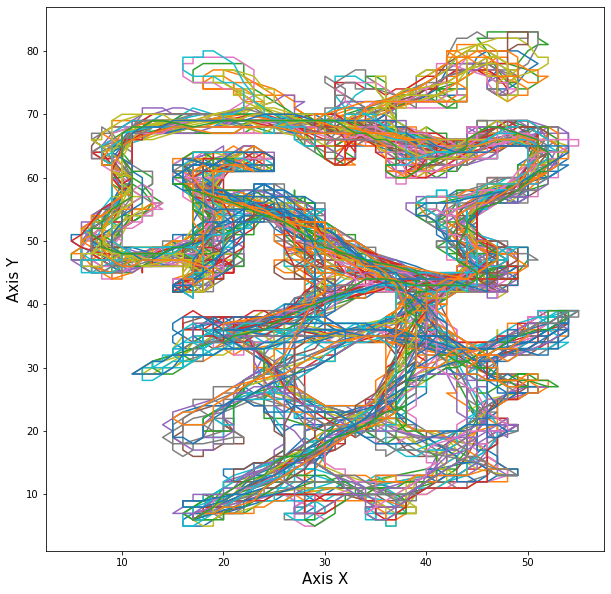

In [44]:
level_73_DF=SHQ_DF[SHQ_DF['level']==73]
fig=plt.figure(figsize=(10,10))
tra_73=[]
X=[]
Y=[]
for i in level_73_DF.iterrows():
    trajectory=i[1]['trajectory']
    x=[]
    y=[]
    for j in trajectory:
        x.append(j[0])
        y.append(j[1])
        X.append(j[0])
        Y.append(j[1])
    plt.plot(x,y)
    tra_73.append([x,y])
plt.xlabel('Axis X',fontsize=15)
plt.ylabel('Axis Y',fontsize=15)
plt.show()

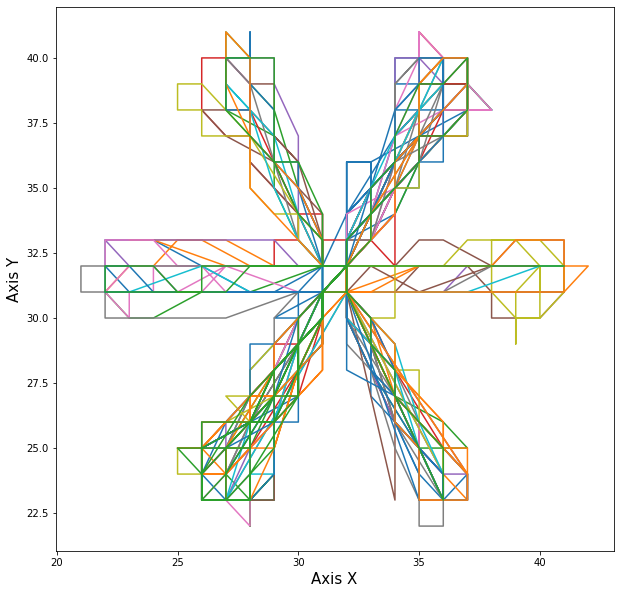

[[[32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 31, 31, 30, 29, 28, 26, 26, 26, 26, 26, 26, 26, 28, 30, 30, 30, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 33, 35, 37, 37, 38, 38, 38, 37, 37, 36, 35, 34, 33, 32, 32, 32, 32, 31, 30, 28, 28, 28, 28, 28, 27, 26, 26, 26, 26, 26, 26, 26, 27, 28, 28, 28, 29, 29, 29, 29, 29, 30, 31, 31, 32, 32, 32, 32, 34, 34, 35, 35, 35, 36, 36, 36, 36, 36, 35, 34, 33, 32, 32, 32, 32, 31, 31, 29, 28, 26, 26, 25, 25, 26, 26, 26, 28, 29, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 34, 35, 36, 37, 37, 37, 37, 36, 35, 33, 33, 32, 32, 32, 32, 32, 32, 31, 30, 29, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 31, 30, 29, 28, 27, 26, 26, 25, 25, 26, 26, 26, 26, 2

In [128]:
level_5_DF=SHQ_DF[SHQ_DF['level']==5]
fig=plt.figure(figsize=(10,10))
tra_5=[]
X=[]
Y=[]
for i in level_5_DF.iterrows():
    trajectory=i[1]['trajectory']
    x=[]
    y=[]
    for j in trajectory:
        x.append(j[0])
        y.append(j[1])
        X.append(j[0])
        Y.append(j[1])
        tra_5.append([x,y])
    plt.plot(x,y)
    
plt.xlabel('Axis X',fontsize=15)
plt.ylabel('Axis Y',fontsize=15)
plt.show()
print(tra_5)

In [50]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import time

In [114]:
data=np.array(tra_73)
clustering=DBSCAN(eps=0.1,min_samples=5).fit(data)
labels=clustering.labels_.tolist()
# print(labels)

[0, 0, 0, 1, 2, 3, 4, 4, 4, 5, 6, 7, 8, 9, -1, -1, 10, 11, 11, 11, 11, 12, 13, 14, 15, 16, 17, 18, -1, 19, 20, 21, 22, 23, -1, 24, 25, 26, 27, 28, 29, -1, 30, 31, 32, 33, 34, 35, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, -1, 47, 48, 49, 49, 50, 51, 52, -1, -1, -1, -1, -1, 53, 53, 54, 55, 56, 57, 50, 47, 58, -1, -1, 59, -1, 60, 61, 62, 63, 64, 65, 66, 67, 67, 67, 67, 67, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 81, 82, 83, 83, 84, 85, 86, 86, 87, 88, 88, 89, 89, 90, 90, 91, 84, 81, 92, 93, 94, 95, 95, 96, 96, 96, 97, 98, 99, 100, 101, 102, 103, 104, -1, 105, -1, 106, 107, 107, 108, 109, 110, -1, -1, -1, -1, -1, 52, 111, 56, 112, 113, 113, 114, 115, 116, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 125, 40, 126, 126, 127, 128, 129, 45, 130, -1, 131, 132, 117, -1, 8, 7, 6, 133, 134, 134, 3, 135, 135, 135, -1, 2, 136, 136, -1, -1, -1, -1, -1, -1, 137, 138, 139, 140, 141, 142, 143, 112, 56, 111, 111, -1, -1, 52, 144, 145, 146, 131, 131, 147, 148, 149, 150, 151,

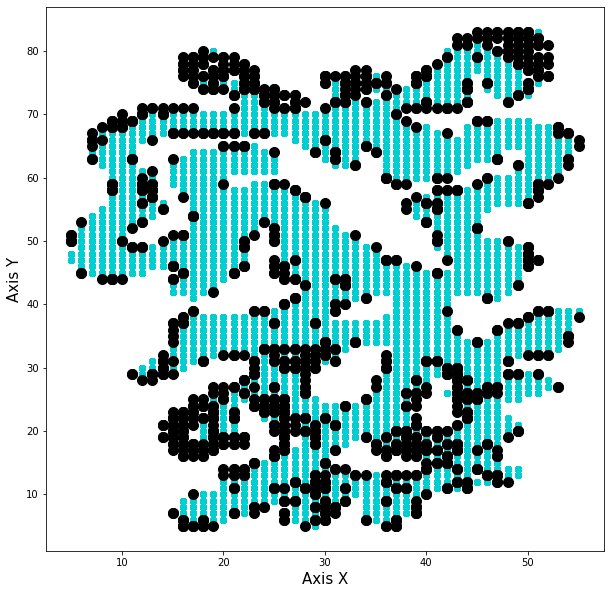

In [115]:
fig=plt.figure(figsize=(10,10))
tra_73=[]
for i in level_73_DF.iterrows():
    trajectory=i[1]['trajectory']
    x=[]
    y=[]
    for j in trajectory:
        x.append(j[0])
        y.append(j[1])
        temp=[]
        temp.append(j[0])
        temp.append(j[1])
        tra_73.append(temp)
    plt.scatter(x,y,color='#00CED1')

for i in range(0,len(tra_73)):
    if labels[i]==-1:
        plt.scatter(tra_73[i][0],tra_73[i][1],color='#000000',s=100)
plt.xlabel('Axis X',fontsize=15)
plt.ylabel('Axis Y',fontsize=15)
plt.show()

In [129]:
fig=plt.figure(figsize=(10,10))
tra_5=[]
for i in level_5_DF.iterrows():
    trajectory=i[1]['trajectory']
    x=[]
    y=[]
    for j in trajectory:
        x.append(j[0])
        y.append(j[1])
        temp=[]
        temp.append(j[0])
        temp.append(j[1])
        tra_5.append(temp)

print(tra_5)

[[32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [31, 31], [31, 30], [30, 28], [29, 27], [28, 26], [26, 25], [26, 25], [26, 25], [26, 25], [26, 25], [26, 25], [26, 25], [28, 26], [30, 27], [30, 28], [30, 29], [31, 30], [31, 31], [31, 31], [32, 32], [32, 32], [32, 32], [32, 32], [32, 32], [32, 32], [32, 33], [33, 35], [35, 37], [37, 38], [37, 38], [38, 38], [38, 38], [38, 38], [37, 38], [37, 38], [36, 37], [35, 37], [34, 36], [33, 34], [32, 33], [32, 32], [32, 32], [32, 32], [31, 31], [30, 30], [28, 28], [28, 28], [28, 28], [28, 28], [28, 27], [27, 26], [26, 25], [26, 25], [26, 25], [26, 25], [26, 25], [26, 24], [26, 24], [27, 23], [28, 23], [28, 23], [28, 23], [29, 23], [29, 24], [29, 25], [29, 26],

<Figure size 720x720 with 0 Axes>

In [130]:
data1=np.array(tra_5)
clustering=DBSCAN(eps=0.1,min_samples=5).fit(data1)
labels=clustering.labels_.tolist()
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 6, 6, 6, 6, 6, 6, 5, 7, 3, 8, 2, 1, 1, 9, 9, 9, 9, 9, 9, 10, 11, 12, 13, 13, 14, 14, 14, 13, 13, 15, 12, 16, 17, 10, 9, 9, 9, 1, 18, 19, 19, 19, 19, 20, 21, 6, 6, 6, 6, 6, 22, 22, 23, 24, 24, 24, -1, 25, 26, 27, 28, 8, 2, 1, 0, 9, 9, 29, 16, 30, 31, 32, 32, 33, 33, 33, 34, 35, 36, 37, 17, 10, 9, 9, 9, 1, 2, 28, 5, 6, 6, 38, 38, 6, 6, 6, 5, 4, 3, 39, 1, 1, 9, 9, 9, 17, 40, 40, 40, 40, 40, -1, -1, -1, -1, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 17, 16, 12, 15, 41, 41, 41, 41, 15, 12, 40, 11, 10, 9, 9, 9, 9, 0, 1, 8, 4, 27, 27, 27, 27, -1, -1, 7, 3, 39, 2, 1, 0, 9, 9, 29, 11, 40, 40, 40, 40, -1, -1, 29, 10, 9, 9, 9, 9, 9, 9, 9, 0, 1, 8, 4, 5, 42, 22, 6, 38, 38, 6, 6, 6, -1, 21, 27, 7, 3, 39, 2, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 0, 1, 43, 43, 43, 43, 43, 43, 43, 18, 44, 45, 29, 37, 36, 31, 32, 32, 32, -1, 46, 30, 36, 12, 15, -1, 4

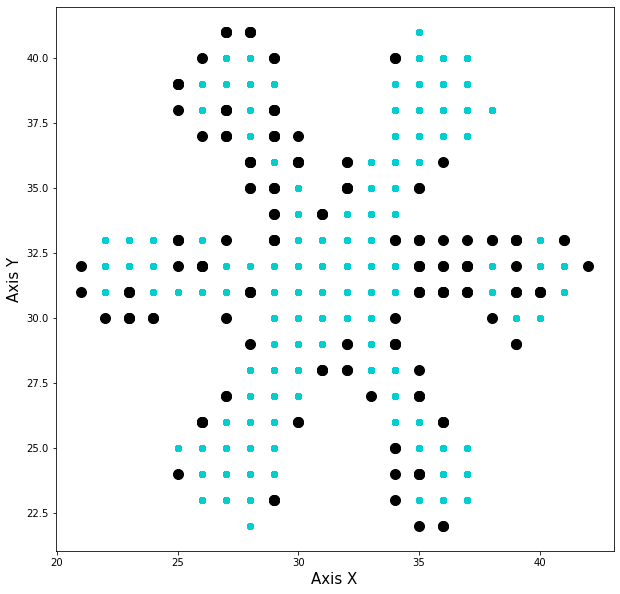

In [131]:
fig=plt.figure(figsize=(10,10))
tra_5=[]
for i in level_5_DF.iterrows():
    trajectory=i[1]['trajectory']
    x=[]
    y=[]
    for j in trajectory:
        x.append(j[0])
        y.append(j[1])
        temp=[]
        temp.append(j[0])
        temp.append(j[1])
        tra_5.append(temp)
    plt.scatter(x,y,color='#00CED1')

for i in range(0,len(tra_5)):
    if labels[i]==-1:
        plt.scatter(tra_5[i][0],tra_5[i][1],color='#000000',s=100)
plt.xlabel('Axis X',fontsize=15)
plt.ylabel('Axis Y',fontsize=15)
plt.show()

In [133]:
level_68_DF=SHQ_DF[SHQ_DF['level']==68]
fig=plt.figure(figsize=(10,10))
tra_68=[]
for i in level_68_DF.iterrows():
    trajectory=i[1]['trajectory']
    x=[]
    y=[]
    for j in trajectory:
        x.append(j[0])
        y.append(j[1])
        temp=[]
        temp.append(j[0])
        temp.append(j[1])
        tra_68.append(temp)

print(tra_5)

[[32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [32, 31], [31, 31], [31, 30], [30, 28], [29, 27], [28, 26], [26, 25], [26, 25], [26, 25], [26, 25], [26, 25], [26, 25], [26, 25], [28, 26], [30, 27], [30, 28], [30, 29], [31, 30], [31, 31], [31, 31], [32, 32], [32, 32], [32, 32], [32, 32], [32, 32], [32, 32], [32, 33], [33, 35], [35, 37], [37, 38], [37, 38], [38, 38], [38, 38], [38, 38], [37, 38], [37, 38], [36, 37], [35, 37], [34, 36], [33, 34], [32, 33], [32, 32], [32, 32], [32, 32], [31, 31], [30, 30], [28, 28], [28, 28], [28, 28], [28, 28], [28, 27], [27, 26], [26, 25], [26, 25], [26, 25], [26, 25], [26, 25], [26, 24], [26, 24], [27, 23], [28, 23], [28, 23], [28, 23], [29, 23], [29, 24], [29, 25], [29, 26],

<Figure size 720x720 with 0 Axes>

In [134]:
level_73_DF=SHQ_DF[SHQ_DF['level']==73]
data1=np.array(tra_68)
clustering=DBSCAN(eps=0.1,min_samples=5).fit(data1)
labels=clustering.labels_.tolist()
print(labels)

[0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, -1, 21, 22, 23, 23, 24, 24, 25, 26, 27, 28, 28, 29, 30, 31, 32, 33, 33, 33, 33, 33, 33, 33, -1, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 48, 49, 50, 51, 52, 53, 54, 55, 56, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 69, 69, 69, 69, 69, 70, 71, 72, 67, 65, 63, 73, 74, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 46, 88, 89, 90, 91, 92, 40, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 106, 107, 108, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 118, 0, 0, 0, 0, 119, -1, -1, -1, -1, -1, 4, 120, 5, 6, 7, 121, 122, 123, 124, 124, 125, 126, 127, 11, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 138, -1, 139, -1, -1, -1, 140, 141, 142, 142, 143, 143, 144, 145, 146, 147, -1, 148, 149, 150, 151, 151, -1, -1, -1, 152, -1, 153, 154, 155, 156, 157, 158, 159, -1, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 174,

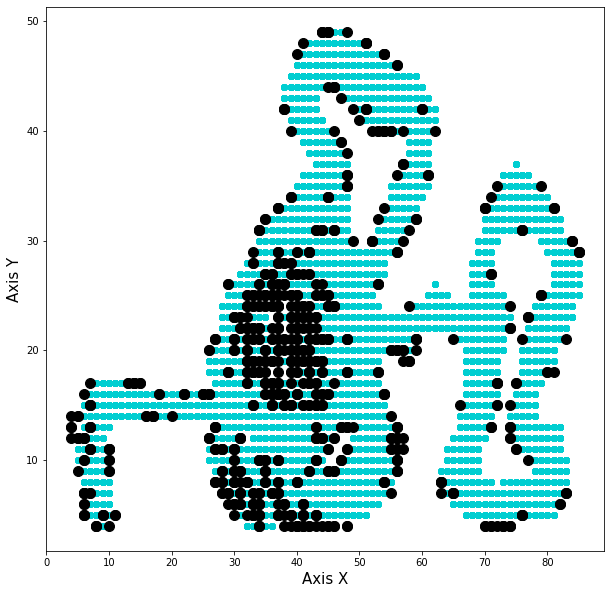

In [135]:
fig=plt.figure(figsize=(10,10))
tra_68=[]
for i in level_68_DF.iterrows():
    trajectory=i[1]['trajectory']
    x=[]
    y=[]
    for j in trajectory:
        x.append(j[0])
        y.append(j[1])
        temp=[]
        temp.append(j[0])
        temp.append(j[1])
        tra_68.append(temp)
    plt.scatter(x,y,color='#00CED1')

for i in range(0,len(tra_68)):
    if labels[i]==-1:
        plt.scatter(tra_68[i][0],tra_68[i][1],color='#000000',s=100)
plt.xlabel('Axis X',fontsize=15)
plt.ylabel('Axis Y',fontsize=15)
plt.show()

In [47]:
def find_neighbor(j, x, eps):
    N = list()
    for i in range(x.shape[0]):
        temp = np.sqrt(np.sum(np.square(x[j] - x[i]))) 
        if temp <= eps:
            N.append(i)
    return set(N)

In [123]:
level_73_DF['captured_flag']

1212     [(0, 0), (3, 0), (0, 8), (3, 9), (4, 19), (0, ...
2487     [(0, 0), (3, 0), (3, 15), (1, 24), (3, 24), (2...
4357     [(0, 0), (3, 0), (2, 1), (1, 8), (1, 14), (2, ...
6612     [(0, 0), (3, 0), (1, 23), (1, 48), (2, 49), (3...
6976     [(0, 0), (3, 0), (1, 13), (2, 17), (2, 22), (1...
8850     [(0, 0), (3, 0), (1, 14), (2, 14), (0, 17), (3...
10471    [(0, 0), (3, 0), (1, 14), (2, 14), (3, 16), (2...
10692    [(0, 0), (3, 0), (1, 13), (2, 14), (3, 17), (1...
11025    [(0, 0), (3, 0), (0, 9), (3, 9), (0, 24), (1, ...
12030    [(0, 0), (3, 0), (4, 20), (0, 21), (1, 21), (2...
13081    [(0, 0), (1, 0), (2, 0), (3, 0), (1, 4), (2, 4...
13942    [(0, 0), (3, 0), (0, 33), (4, 34), (2, 40), (1...
15260    [(0, 0), (1, 0), (2, 0), (3, 0), (3, 22), (1, ...
15641    [(0, 0), (3, 0), (3, 23), (1, 26), (2, 29), (1...
17625    [(0, 0), (1, 0), (2, 0), (3, 0), (3, 8), (3, 3...
18016    [(0, 0), (3, 0), (3, 21), (1, 25), (1, 33), (3...
19156    [(0, 0), (1, 0), (2, 0), (3, 0), (1, 20), (2, .

In [104]:
player_df1=SHQ_DF[SHQ_DF['user_id']=='091b63c4-cbea-4970-8c43-64c9666bce0e']
player_df1

user_id  level   duration  \
20989  091b63c4-cbea-4970-8c43-64c9666bce0e      1  18.100979   
26824  091b63c4-cbea-4970-8c43-64c9666bce0e      2  32.418740   
36104  091b63c4-cbea-4970-8c43-64c9666bce0e      9  13.215393   
40445  091b63c4-cbea-4970-8c43-64c9666bce0e      2  45.654410   
43387  091b63c4-cbea-4970-8c43-64c9666bce0e      6  95.505460   
46398  091b63c4-cbea-4970-8c43-64c9666bce0e      1  18.933430   
48808  091b63c4-cbea-4970-8c43-64c9666bce0e     11  64.951720   

      previous_attempts platform                record_time  \
20989                 2  ANDROID  2016-06-10T08:26:25+00:00   
26824                 2  ANDROID  2016-06-08T11:30:25+00:00   
36104                 2  ANDROID  2016-06-12T05:47:11+00:00   
40445                 2  ANDROID  2016-06-08T16:42:11+00:00   
43387                 3  ANDROID  2016-08-16T07:31:03+00:00   
46398                 2  ANDROID  2016-06-09T14:58:40+00:00   
48808                 2  ANDROID  2016-06-10T15:52:59+00:00   

                                           captured_flag  \
20989       [(0, 0), (0, 11), (0, 14), (0, 19), (0, 27)]   
26824                         [(0, 0), (0, 46), (0, 54)]   
36104                                          [(0, 16)]   
40445  [(0, 0), (0, 20), (0, 27), (0, 30), (0, 40), (...   
43387  [(0, 0), (1, 0), (2, 0), (1, 12), (2, 20), (0,...   
46398                                  [(0, 0), (0, 10)]   
48808  [(1, 20), (2, 20), (2, 25), (1, 26), (2, 30), ...   

                                              trajectory  
20989  [(11, 12, 2), (11, 12, 2), (11, 12, 2), (12, 1...  
26824  [(25, 10, 0), (25, 10, 0), (25, 10, 0), (25, 1...  
36104  [(31, 8, 0), (31, 8, 0), (31, 8, 0), (31, 8, 0...  
40445  [(25, 10, 0), (25, 10, 0), (25, 10, 0), (25, 1...  
43387  [(28, 9, 0), (28, 9, 0), (28, 9, 0), (28, 9, 0...  
46398  [(11, 12, 2), (11, 12, 2), (11, 12, 2), (12, 1...  
48808  [(38, 9, 12), (38, 9, 12), (38, 9, 12), (38, 9...

In [136]:
player_df2=SHQ_DF[SHQ_DF['user_id']=='0a40c670-b95f-4ffd-aad9-1be30a3ecfd5']
player_df2

user_id  level   duration  \
16794  0a40c670-b95f-4ffd-aad9-1be30a3ecfd5     22  36.802124   
19172  0a40c670-b95f-4ffd-aad9-1be30a3ecfd5      7  22.551361   
26163  0a40c670-b95f-4ffd-aad9-1be30a3ecfd5     37  37.985596   
44391  0a40c670-b95f-4ffd-aad9-1be30a3ecfd5     42  62.626830   

      previous_attempts platform                record_time  \
16794                 7      iOS  2018-07-22T12:04:17+00:00   
19172                 7      iOS  2018-07-22T11:53:37+00:00   
26163                12      iOS  2018-07-25T11:17:08+00:00   
44391                 5      iOS  2018-07-19T18:49:43+00:00   

                                           captured_flag  \
16794  [(1, 5), (0, 7), (2, 8), (0, 19), (2, 19), (1,...   
19172  [(0, 0), (1, 0), (2, 0), (0, 14), (1, 17), (1,...   
26163  [(1, 0), (1, 7), (0, 8), (2, 9), (3, 11), (3, ...   
44391  [(3, 17), (2, 21), (1, 50), (0, 63), (2, 71), ...   

                                              trajectory  
16794  [(29, 8, 13), (29, 8, 14), (29, 8, 14), (27, 1...  
19172  [(33, 10, 0), (33, 10, 0), (33, 10, 15), (33, ...  
26163  [(34, 9, 12), (33, 9, 13), (32, 10, 13), (30, ...  
44391  [(42, 10, 0), (42, 10, 0), (42, 10, 0), (42, 1...

In [137]:
player_df3=SHQ_DF[SHQ_DF['user_id']=='894f224e-16df-4e87-a7ca-c230bf5b6008']
player_df3

user_id  level    duration  \
11520  894f224e-16df-4e87-a7ca-c230bf5b6008     43  175.989500   
32842  894f224e-16df-4e87-a7ca-c230bf5b6008      3   29.637238   
37491  894f224e-16df-4e87-a7ca-c230bf5b6008      2   23.269562   

      previous_attempts platform                record_time  \
11520                 1      iOS  2017-12-30T16:35:04+00:00   
32842                 2      iOS  2017-12-26T19:52:33+00:00   
37491                 1      iOS  2017-12-13T13:27:17+00:00   

                                           captured_flag  \
11520  [(3, 9), (2, 32), (3, 68), (3, 74), (3, 81), (...   
32842  [(0, 0), (1, 0), (1, 7), (1, 10), (0, 11), (0,...   
37491                                  [(0, 0), (0, 35)]   

                                              trajectory  
11520  [(9, 22, 0), (9, 22, 0), (9, 22, 16), (9, 23, ...  
32842  [(25, 9, 0), (25, 9, 0), (25, 9, 0), (25, 9, 0...  
37491  [(25, 10, 0), (25, 10, 0), (25, 10, 0), (25, 1...

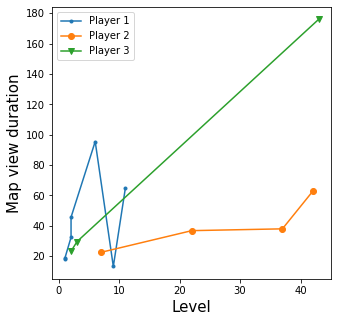

In [151]:
x1=list()
y1=list()
x2=list()
y2=list()
x3=list()
y3=list()
for i in player_df.iterrows():
    x1.append(i[1]['level'])
    y1.append(i[1]['duration'])
for i in player_df2.iterrows():
    x2.append(i[1]['level'])
    y2.append(i[1]['duration'])
for i in player_df3.iterrows():
    x3.append(i[1]['level'])
    y3.append(i[1]['duration'])
fig=plt.figure(figsize=(5,5))

x1, y1 = zip(*sorted(zip(x1, y1)))
x2, y2 = zip(*sorted(zip(x2, y2)))
x3, y3 = zip(*sorted(zip(x3, y3)))

plt.plot(x1,y1,marker='.',label='Player 1')
plt.plot(x2,y2,marker='o',label='Player 2')
plt.plot(x3,y3,marker='v',label='Player 3')
plt.xlabel('Level',fontsize=15)
plt.ylabel('Map view duration',fontsize=15)
plt.legend()
plt.show()

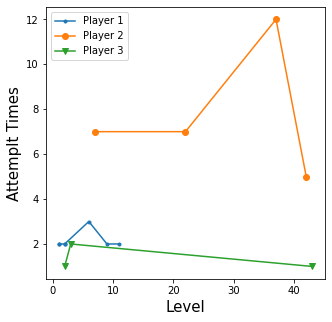

In [148]:
x1=list()
y1=list()
x2=list()
y2=list()
x3=list()
y3=list()
for i in player_df.iterrows():
    x1.append(i[1]['level'])
    y1.append(i[1]['previous_attempts'])
for i in player_df2.iterrows():
    x2.append(i[1]['level'])
    y2.append(i[1]['previous_attempts'])
for i in player_df3.iterrows():
    x3.append(i[1]['level'])
    y3.append(i[1]['previous_attempts'])
fig=plt.figure(figsize=(5,5))

x1, y1 = zip(*sorted(zip(x1, y1)))
x2, y2 = zip(*sorted(zip(x2, y2)))
x3, y3 = zip(*sorted(zip(x3, y3)))

plt.plot(x1,y1,marker='.',label='Player 1')
plt.plot(x2,y2,marker='o',label='Player 2')
plt.plot(x3,y3,marker='v',label='Player 3')
plt.xlabel('Level',fontsize=15)
plt.ylabel('Attemplt Times',fontsize=15)
plt.legend()
plt.show()